In [21]:
#matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_csv('testset01.csv')

In [22]:
fruits.head()

,Unnamed: 0,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,1,apple,granny_smith,192,8.4,7.3,0.55
1,2,1,apple,granny_smith,180,8.6,9.6,0.59
2,3,1,apple,granny_smith,176,9.2,8.6,0.60
3,4,2,mandarin,mandarin,86,9.4,7.7,0.80
4,5,2,mandarin,mandarin,84,9.2,7.8,0.79


In [23]:
#create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

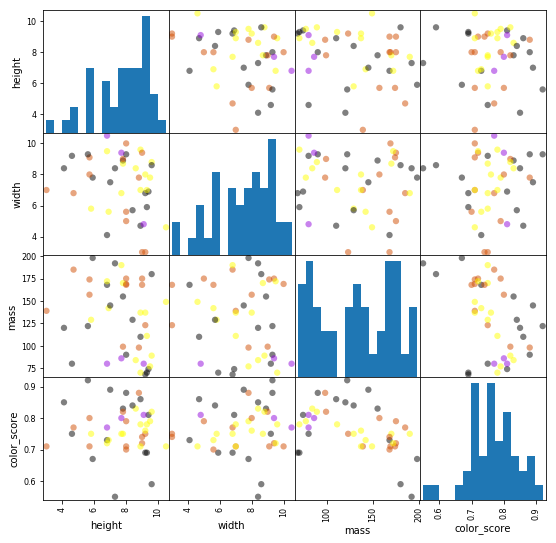

In [24]:
#plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

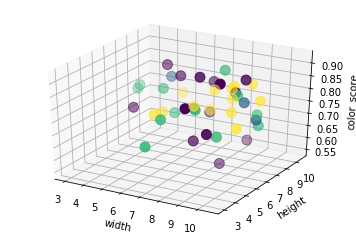

In [25]:
#plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [26]:
# Create train-test split
# for this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
#create classifier object
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)


In [28]:
#train the classifier (fit the estimator) using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
# estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)

0.4666666666666667

In [30]:
#use the trained k-NN classifier model to classify new, previously unseen objects
# first example: a small fruit with mass 20g, width 4.3 cm height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'apple'

In [31]:
#second example: a larger, elongated fruit with mass 100g, width 6.3cm, height 8.5cm 
fruit_predictin = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'apple'

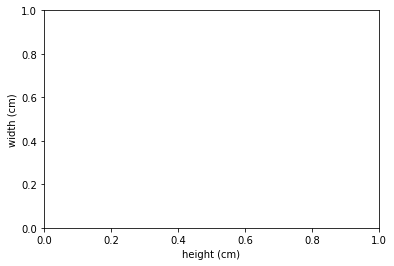

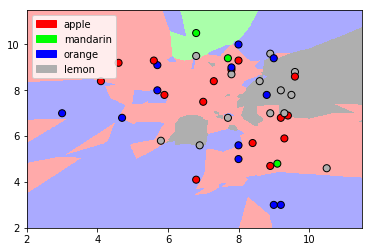

In [36]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
# X = df[['mass', 'width', 'height', 'color_score']]
# y = df['fruit_label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
#plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

ValueError: x and y must be the same size

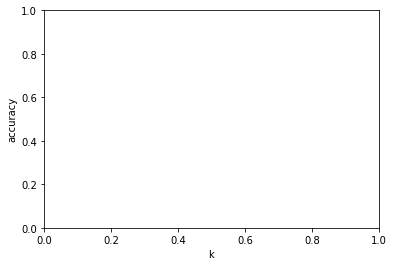

In [41]:
#how sensitive is k-NN classification accuracy to the choice of the 'k' parameter?
k_range = range(1, 20)
scores = []

for k in k_range:
    knn= KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, scores)
    plt.xticks([0, 5, 10, 15, 20]);

Text(0,0.5,'accuracy')

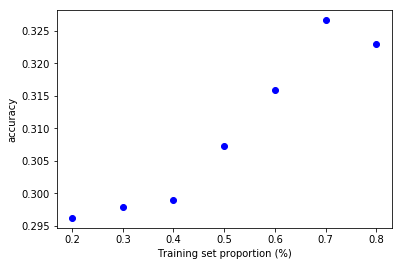

In [42]:
# How sensitive is k-NN classification accuracy to the train/test split proportion?
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores=[]
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
    
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')